In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [139]:
x_df = pd.read_csv('/home/oleg/Documents/matmod_challeng/X.csv')
y_df = pd.read_csv('/home/oleg/Documents/matmod_challeng/y.csv')


x_vals = x_df.columns
predicted_cols = y_df.columns


merged_df = pd.merge(x_df, y_df, on=["engine_id", "flight_datetime", "flight_phase"])

merged_df = merged_df.dropna(axis=1, how='all')

merged_df = merged_df.drop(x_vals.intersection(predicted_cols) , axis=1)
merged_df = merged_df.dropna(axis=1, how='all')
merged_df = merged_df.fillna(0)
merged_df = merged_df.loc[:,merged_df.apply(pd.Series.nunique) != 1]


to_rm = [  'aircraft_id',  'engine_position', 'number_blades', 'engine_family', 'engine_type', 'manufacturer', 'aircraft_family', 'aircraft_grp', 'ac_manufacturer', 'aircraft_type', ]
merged_df = merged_df.drop(to_rm, axis=1)


In [140]:
x_vals = x_vals.drop(to_rm).drop(['engine_id', 'flight_datetime', 'flight_phase'])
predicted_cols = predicted_cols.drop(['engine_id', 'flight_datetime', 'flight_phase'])


x_vals = x_vals.intersection(merged_df.columns)
predicted_cols = predicted_cols.intersection(merged_df.columns)

In [141]:
train_dataset = merged_df.sample(frac=0.8, random_state=0)
test_dataset = merged_df.drop(train_dataset.index)

In [142]:


train_features = train_dataset[x_vals]
test_features = test_dataset[x_vals]

train_labels = train_dataset['ZTLA_D']
test_labels = test_dataset['ZTLA_D']


In [143]:


normalizer = tf.keras.layers.Normalization()
normalizer.adapt(train_features)


In [144]:

train = np.array(train_features)

train_normalizer = layers.Normalization()
train_normalizer.adapt(train)

In [145]:
train_model = tf.keras.Sequential([
    train_normalizer,
    layers.Dense(units=1)
])


In [146]:
train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

598/598 [==============================] - 1s 891us/step


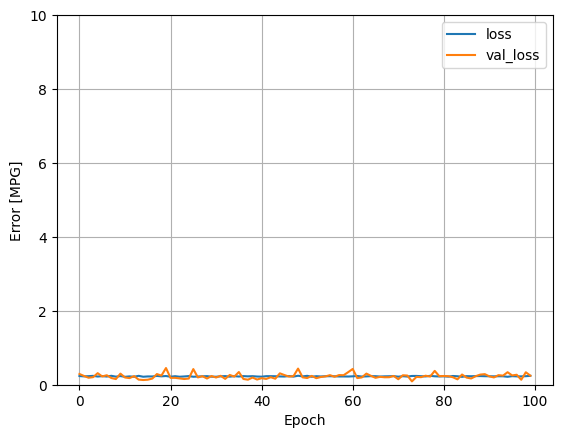

In [147]:
history = train_model.fit(
    train_features,
    train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


pred = train_model.predict(test_features)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [148]:
from sklearn.metrics import r2_score


print(pred)
print(r2_score(test_labels , pred))

[[ 0.028]
 [ 0.199]
 [ 0.107]
 ...
 [-0.155]
 [ 0.228]
 [-0.234]]
-313.980651191634
